#### RNN text prediction

In [108]:
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

url = "https://www.gutenberg.org/files/1661/1661-0.txt"
response = requests.get(url)

with open("book.txt", "w", encoding="utf-8") as f:
    f.write(response.text)

print("Download complete. Saved to book.txt.")

text = open('book.txt', 'r', encoding='utf-8').read()
text= text.lower()

sentences = text.split('\n')

tokenizer = Tokenizer(oov_token='<UNK>')
tokenizer.fit_on_texts(sentences) ## this builds the vocablary

vocab_size = len(tokenizer.word_index) + 1
# 1 is added to consider the out of vocabulary token (i.e. ‘oov_token’) while calculating the vocabulary size
sequences = tokenizer.texts_to_sequences(sentences)

input_sequences = []
for sequence in sequences:
    for i in range(1,len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

max_seq_len = max([len(seq) for seq in input_sequences])
padded_sequences = pad_sequences(input_sequences, maxlen = max_seq_len)

padded_sequences = np.array(padded_sequences)
x = padded_sequences[:, :-1]
labels  = padded_sequences[:, -1]
# one hot encoding labels
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)


#define and compile the model
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(vocab_size, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
model.build(input_shape=(None, max_seq_len - 1))
# model.summary()

#initialize the callback for early stopping the training if there is not at least 1% improvement in the accuracy 

es = EarlyStopping(monitor = 'acc', min_delta=0.01)

model.fit(x, y, epochs=50, verbose=1, batch_size=512, callbacks=[es])


Download complete. Saved to book.txt.


In [110]:
import requests

url = "https://www.gutenberg.org/files/1661/1661-0.txt"
response = requests.get(url)

with open("book.txt", "w", encoding="utf-8") as f:
    f.write(response.text)

print("Download complete. Saved to book.txt.")


Download complete. Saved to book.txt.


In [111]:
text = open('book.txt', 'r', encoding='utf-8').read()
text= text.lower()

In [112]:
sentences = text.split('\n')
type(sentences)

list

##### so we got a list of sentences now we will be fitting a tokenizer
##### it means building a dictionary of words, where each work has a unique identifier

In [113]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### going ahead with tokenizing the text
##### to do this we have to initialise an object of the Tokenizer

In [114]:
tokenizer = Tokenizer(oov_token='<UNK>')

In [115]:
tokenizer.fit_on_texts(sentences) ## this builds the vocablary

In [116]:
vocab_size = len(tokenizer.word_index) + 1
# 1 is added to consider the out of vocabulary token (i.e. ‘oov_token’) while calculating the vocabulary size
vocab_size

8923

In [117]:
## this will take all the sentences and convert each word in it to number using the no.s in the word_index

sequences = tokenizer.texts_to_sequences(sentences)

In [118]:
## creating n_gram sequences, all subsets containing 1st element
input_sequences = []
for sequence in sequences:
    for i in range(1,len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

In [119]:
print(input_sequences[0])

[4776, 158]


In [120]:
## padding sequences - when we train the model all the sequences needs to be of same length
# so we will take the highest length sequence and pad all other sequence based on that

max_seq_len = max([len(seq) for seq in input_sequences])
max_seq_len

20

In [121]:
padded_sequences = pad_sequences(input_sequences, maxlen = max_seq_len)

In [122]:
print(padded_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4776  158]


##### Now we are approaching training part, but before that we have to make our data in input output format
##### so what we will do is that for all the sequences - we will take all the elements except the last one as input and the last element as the output

In [123]:
import numpy as np

In [124]:
padded_sequences = np.array(padded_sequences)

In [125]:
x = padded_sequences[:, :-1]
labels  = padded_sequences[:, -1]

In [126]:
# one hot encoding labels
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [127]:
y.shape, x.shape

((101523, 8923), (101523, 19))

In [128]:
## training model

In [129]:
#import dependencies for defining the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [135]:
#define and compile the model
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(512)))
model.add(Dense(vocab_size, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
model.build(input_shape=(None, max_seq_len - 1))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 19, 128)             │       1,142,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 19, 512)             │         788,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 1024)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8923)                │       9,146,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,275,099 (58.27 MB)

 Trainable params: 15,275,099 (58.27 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
#initialize the callback for early stopping the training if there is not at least 1% improvement in the accuracy 
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'acc', min_delta=0.01)

In [137]:
model.fit(x, y, epochs=50, verbose=1, batch_size=512, callbacks=[es])

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 912s 5s/step - acc: 0.0578 - loss: 6.6626
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 883s 4s/step - acc: 0.1067 - loss: 5.7214
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - acc: 0.1273 - loss: 5.4440
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - acc: 0.1367 - loss: 5.2662


In [107]:
#Time to become storyteller!
# seed_text = "I could not help laughing at the ease with which he explained his process of deduction" 
seed_text = "the thing always appears to me to be so ridiculously simple that I could easily do it myself"          

next_words = 50
  
for _ in range(next_words):
  sequence = tokenizer.texts_to_sequences([seed_text])
  padded = pad_sequences(sequence, maxlen=max_seq_len-1)
  predicted = np.argmax(model.predict(padded, verbose=0), axis=-1)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word
print(seed_text)

the thing always appears to me to be so ridiculously simple that I could easily do it myself for he said that he would be true to me ” he said rubbing his hands and looked back a piece of paper and i could see that she was in the least of the less opened a very limited foot ” said he “but though i know what a


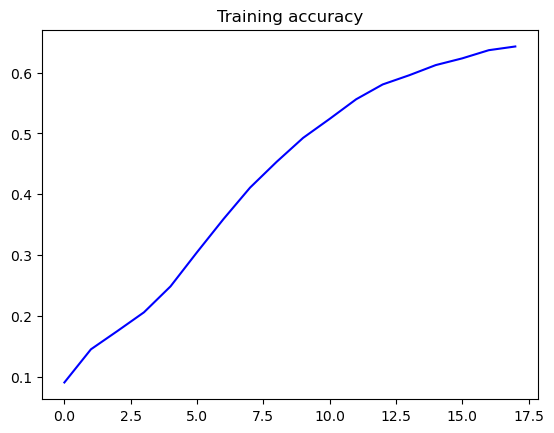

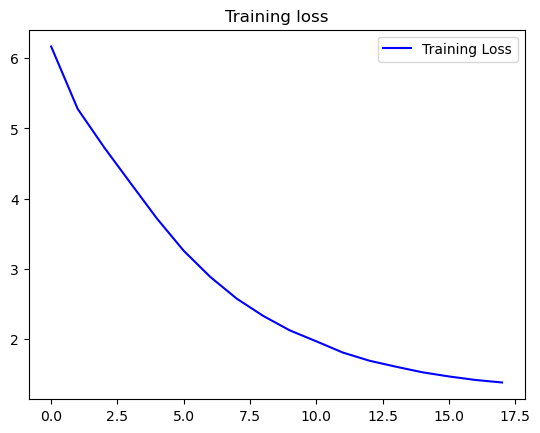

In [106]:
#let's look at how loss and accuracy changed while training
import matplotlib.pyplot as plt
history = model.history
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()